done


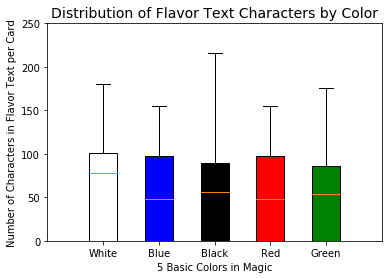

In [91]:
import sqlite3
import os
import matplotlib.pyplot as plt
import numpy as np

whitelist = []
greenlist = []
bluelist = []
blacklist = []
redlist = []
fulllist = []
connection = sqlite3.connect("cardtable.db")
cursor = connection.cursor()
cursor.execute("SELECT Ncolor, Nflavor FROM Ncards")
results = cursor.fetchall()

createtable = "DROP TABLE IF EXISTS pulledcards;"
cursor.execute(createtable)
createtable = "CREATE TABLE pulledcards(Color, Flavortext);"
cursor.execute(createtable)
for color, flavortext in results:
    cursor.execute("INSERT INTO pulledcards(Color, Flavortext) VALUES(?,?)", (color, flavortext))
connection.commit()
connection.close()
print("done")

connection = sqlite3.connect("cardtable.db")
cursor = connection.cursor()
cursor.execute("SELECT Color, Flavortext FROM pulledcards")
newresults = cursor.fetchall()
for cardflavor in newresults:
    for letter in cardflavor[0]:
        if letter == "W":
            whitelist.append(len(cardflavor[1]))
        elif letter == "U":
            bluelist.append(len(cardflavor[1]))
        elif letter == "B":
            blacklist.append(len(cardflavor[1]))
        elif letter == "R":
            redlist.append(len(cardflavor[1]))
        elif letter == "G":
            greenlist.append(len(cardflavor[1]))            
fulllist.append(whitelist)
fulllist.append(bluelist)
fulllist.append(blacklist)
fulllist.append(bluelist)
fulllist.append(greenlist)

myplot = plt.boxplot(fulllist, patch_artist = True)
plt.axis([0, 6, 0, 250])
plt.xticks([1, 2, 3, 4, 5], ['White', 'Blue', 'Black', 'Red', 'Green'])
colors = ['white', 'blue', 'black', 'red', 'green']
for patch, color in zip(myplot['boxes'], colors):
    patch.set_facecolor(color)
plt.title("Distribution of Flavor Text Characters by Color", fontsize = 14)
plt.xlabel("5 Basic Colors in Magic")
plt.ylabel("Number of Characters in Flavor Text per Card")
plt.show()

